<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/Temperature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2009 ~ 2019년 1~12 month 평균최고, 최고극값, 평균최저, 최적극값, 강수량

# 2009 1~12 month 평균 최고 기운 --- plot

# 2009 1~12 month 최대 일교차, (최고극값 - 최저극값), (평균최고 - 평균최저) --- plot

# 2009 1~12 month 강수량 - plot, rank 매겨 가장 건조할 달 순서로 순위

# 지난 2009~2019년간 3월 평균 최고기온 - plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/MyDrive')

np.set_printoptions(precision = 1, suppress = True) # 소수점 아래 첫째까지만 표기 (precision = 1), 지수표현이 아닌 소수 표현 (suppress = True)

In [2]:
def print_info(obj):
  print('type: ', type(obj))
  print('print: {}'.format(obj))

  # 1D array
  print('ndim: ', obj.ndim)
  print('shape: ', obj.shape)
  print('size: ', obj.size)
  print('dtype: ', obj.dtype) # dtype: Data type
  print('itemsize: ', obj.itemsize) # itemsize: Number of bytes that one of element occupied
  print('data: ', obj.data)  # data: Address of array

In [13]:
data = []

with open('/content/drive/MyDrive/인공지능 학습/Project/기상개황_20220324.csv') as f:
  np_data = np.loadtxt(f, delimiter=',',dtype=np.float64) # 2009 ~ 2019년도 기상 자료

# [기온(평균최고), 기온(최고극값), 기온(평균최저), 기온(최저극값), 강수량]
data = np.array(np.hsplit(np_data, 11)) # slice in years
del np_data # Save memory

print_info(data)

type:  <class 'numpy.ndarray'>
print: [[[  19.2   32.5   12.1   -7.6 1772.9]
  [   7.9   12.7    0.    -7.6   17. ]
  [  12.2   17.4    5.    -3.1   79. ]
  [  13.8   20.     6.1   -0.6   72.7]
  [  19.1   23.3   10.7    3.3   95.5]
  [  22.8   26.9   15.3   12.5  173.4]
  [  25.1   29.8   18.7   15.8  187.9]
  [  26.3   29.    21.1   18.4  886.1]
  [  28.1   32.5   22.9   19.8   84.8]
  [  26.4   29.1   20.1   17.6   20. ]
  [  23.4   26.8   15.4   12.4   74.4]
  [  15.2   24.1    7.7   -0.1   69. ]
  [   9.8   17.2    1.8   -6.    13.1]]

 [[  19.    34.1   11.7   -8.1 1441.9]
  [   7.7   15.6   -1.1   -7.2   37.6]
  [  10.    18.4    2.4   -5.    91.1]
  [  11.5   18.5    4.5   -2.5  132.9]
  [  16.    21.     7.8    1.9  146.3]
  [  21.3   27.8   13.9    8.5  186.8]
  [  25.5   29.    19.4   12.4   94.4]
  [  28.3   32.4   23.    20.2  291.9]
  [  30.9   34.1   25.6   24.   165.3]
  [  27.9   32.3   21.4   16.8  182.5]
  [  22.5   26.9   15.1    5.5   72.6]
  [  16.4   21.     7.2 

In [6]:
print(data[0,:,:]) # 2009년도 자료 

[[  19.2   32.5   12.1   -7.6 1772.9]
 [   7.9   12.7    0.    -7.6   17. ]
 [  12.2   17.4    5.    -3.1   79. ]
 [  13.8   20.     6.1   -0.6   72.7]
 [  19.1   23.3   10.7    3.3   95.5]
 [  22.8   26.9   15.3   12.5  173.4]
 [  25.1   29.8   18.7   15.8  187.9]
 [  26.3   29.    21.1   18.4  886.1]
 [  28.1   32.5   22.9   19.8   84.8]
 [  26.4   29.1   20.1   17.6   20. ]
 [  23.4   26.8   15.4   12.4   74.4]
 [  15.2   24.1    7.7   -0.1   69. ]
 [   9.8   17.2    1.8   -6.    13.1]]


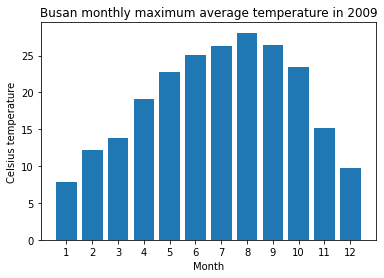

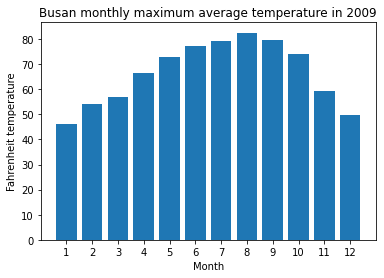

In [7]:
# 2009 1~12 month 평균 최고 기온 --- plot

tn_avg_highest = data[0, 1:, 0]
x = np.arange(1, 13)

plt.figure(1)
plt.bar(x, tn_avg_highest) # bar graph
plt.xticks(x)              # x axis
plt.title('Busan monthly maximum average temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Celsius temperature')

f_temp = tn_avg_highest * 1.8 + 32  # Convert Celsius temperature to Fahrenheit temperature
plt.figure(2)
plt.bar(x, f_temp)
plt.xticks(x)
plt.title('Busan monthly maximum average temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Fahrenheit temperature')

plt.show()


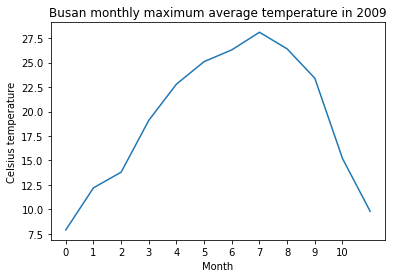

In [18]:
# 2009 1~12 month 평균 최고 기온 --- plot


_, axe = plt.subplots()
axe.plot(tn_avg_highest)
plt.xticks(x)
plt.title('Busan monthly maximum average temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Celsius temperature')

plt.show()


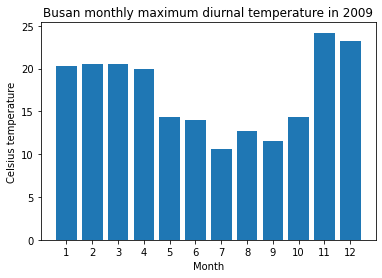

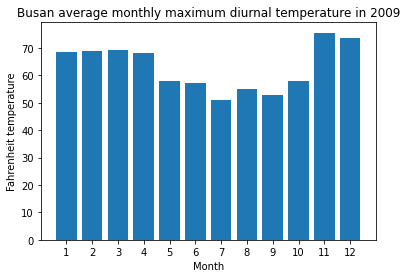

In [8]:
# 2009 1~12 month 최대 일교차, (최고극값 - 최저극값), (평균최고 - 평균최저) --- plot

# 최고극값 - 최저극값
#diurnal temperature

dc_temp = data[0,1:,1] - data[0,1:,3]

plt.figure(1)
plt.bar(x, dc_temp)
plt.xticks(x)
plt.title('Busan monthly maximum diurnal temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Celsius temperature')

df_temp = dc_temp * 1.8 + 32
plt.figure(2)
plt.bar(x, df_temp)
plt.xticks(x)
plt.title('Busan average monthly maximum diurnal temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Fahrenheit temperature')

plt.show()

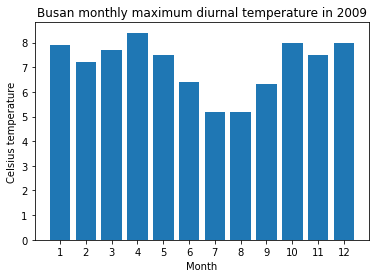

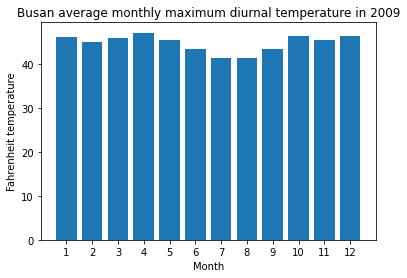

In [9]:
# 2009 1~12 month 최대 일교차, (최고극값 - 최저극값), (평균최고 - 평균최저) --- plot

# 평균최고 - 평균최저
#diurnal temperature

dc_temp = data[0,1:,0] - data[0,1:,2]

plt.figure(1)
plt.bar(x, dc_temp)
plt.xticks(x)
plt.title('Busan monthly maximum diurnal temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Celsius temperature')

df_temp = dc_temp * 1.8 + 32
plt.figure(2)
plt.bar(x, df_temp)
plt.xticks(x)
plt.title('Busan average monthly maximum diurnal temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Fahrenheit temperature')

plt.show()

Text(0, 0.5, 'Precipitation')

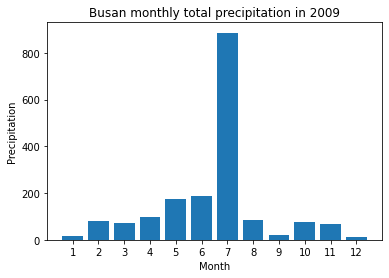

In [10]:
# 2009 1~12 month 강수량 - plot

precipitation = data[0,1:,4]

plt.figure()
plt.bar(x, precipitation)
plt.xticks(x)
plt.title('Busan monthly total precipitation in 2009')
plt.xlabel('Month')
plt.ylabel('Precipitation')

In [19]:
# 2009 1~12 month 강수량 - rank (Ascending)

Month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

indices = precipitation.argsort()  # return indices of sorted order
month = np.array(list(Month.values()))

print(month[indices])
print(precipitation[indices])

['December' 'January' 'September' 'November' 'March' 'October' 'February'
 'August' 'April' 'May' 'June' 'July']
[ 13.1  17.   20.   69.   72.7  74.4  79.   84.8  95.5 173.4 187.9 886.1]


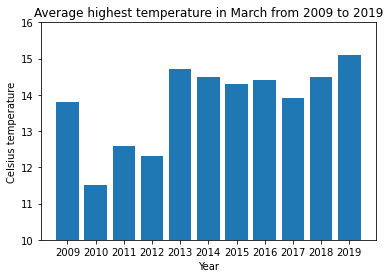

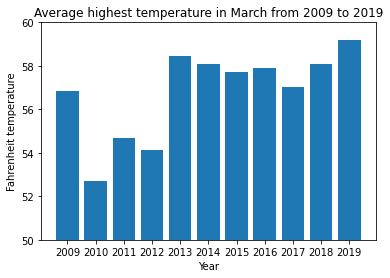

In [21]:
# 지난 2009~2019년간 3월 평균 최고기온 - plot

march_avg_ctemp = data[:,3,0]

years = np.arange(2009, 2020)

x = np.arange(11)

plt.figure(1)
plt.bar(x, march_avg_ctemp)
plt.xticks(x, years)
plt.title('Average highest temperature in March from 2009 to 2019')
plt.xlabel('Year')
plt.ylabel('Celsius temperature')
plt.ylim(10, 16)

mf_temp = march_avg_ctemp * 1.8 + 32
plt.figure(2)
plt.bar(x, mf_temp)
plt.xticks(x, years)
plt.title('Average highest temperature in March from 2009 to 2019')
plt.xlabel('Year')
plt.ylabel('Fahrenheit temperature')
plt.ylim(50, 60)

plt.show()